# Linear Regression with statsmodels


We will discuss how to use the ols method in the statsmodels library.

To demonstrate this method, we will be using a very popular advertising dataset about various costs incurred on advertising by different mediums and the sales for a particular product.

Before we get started with Python, make sure that you watch the video on how to find a linear regression using Tableau.

We will only be looking at the TV variable in this example — we will explore whether TV advertising spending can predict the number of sales for the product. Let’s start by importing this csv file as a pandas dataframe using read_csv():



In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import and display first five rows of advertising dataset
advert = pd.read_csv('https://raw.githubusercontent.com/tvlaz2020/cis230Week4/main/Advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


First, we use statsmodels’ ols function to initialise our simple linear regression model. This takes the formula y ~ X, where X is the predictor variable (TV advertising costs) and y is the output variable (Sales). Then, we fit the model by calling the OLS object’s fit() method.

In [6]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

We don't have calculate the slope or intercept ourselves as this method does it automatically for us! Calling model.params will show us the model’s parameters:

In [7]:
print(model.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In the notation that we have been using, α or c is the intercept and β or m is the slope i.e. α = 7.032 and β = 0.047.

Thus, the equation for the model will be: Sales = 7.032 + 0.047*TV

In plain English, this means that, on average, if we spent $100 on TV advertising, we should expect to sell 11.73 units.

Notice that this should match the data that we got from Tableau.

Now that we’ve fit a simple regression model, we can try to predict the values of sales based on the equation we just derived using the .predict method.

We can also visualise our regression model by plotting sales_pred against the TV advertising costs to find the line of best fit:

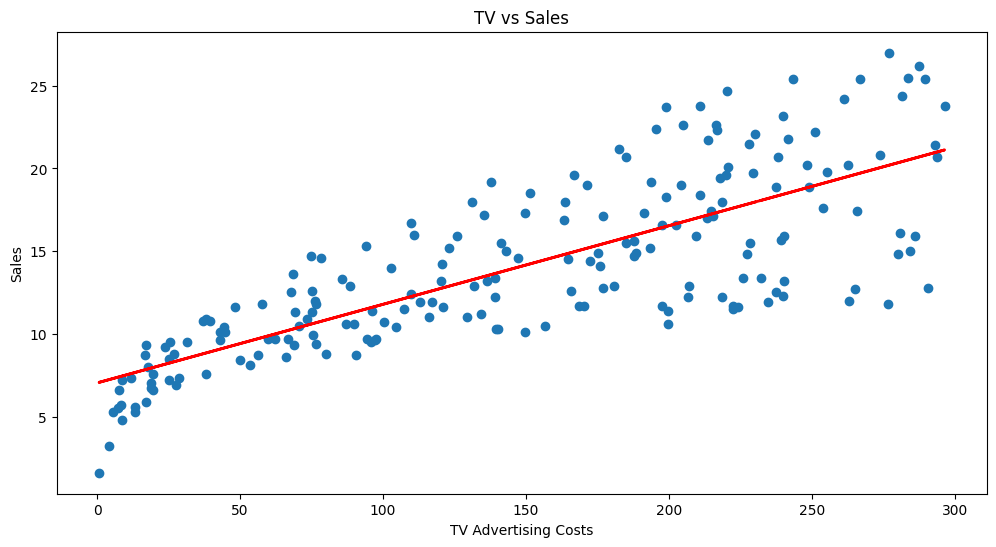

In [8]:
# Predict values
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(advert['TV'], advert['Sales'], 'o')           # scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

We can see that there is a positive linear relationship between TV advertising costs and Sales — in other words, spending more on TV advertising predicts a higher number of sales!

With this model, we can predict sales from any amount spent on TV advertising. For example, if we increase TV advertising costs to $400, we can predict that sales will increase to 26 units:

In [9]:
new_X = 400
model.predict({"TV": new_X})

0    26.04725
dtype: float64

# Linear Regression with scikit-learn

We’ve learnt to implement linear regression models using statsmodels…now let’s learn to do it using scikit-learn!

For this model, we will continue to use the advertising dataset but this time we will use two predictor variables to create a multiple linear regression model. This is simply a linear regression model with more than one predictor, and is modelled by:

Yₑ = α + β₁X₁ + β₂X₂ + … + βₚXₚ, where p is the number of predictors.

In our example, we will be predicting Sales using the variables TV and Radio i.e. our model can be written as:

Sales = α + β₁*TV + β₂*Radio.

First, we initialise our linear regression model, then fit the model to our predictors and output variables:

In [10]:

from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

Again, there is no need to calculate the values for alpha (intercept) and betas ourselves – we just have to call .intercept_ for alpha, and .coef_ for an array with our coefficients beta1 and beta2:

In [11]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


Therefore, our model can be written as:

Sales = 2.921 + 0.046*TV + 0.1880*Radio.

We can predict values by simply using .predict():

In [12]:
model.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

Now that we’ve fit a multiple linear regression model to our data, we can predict sales from any combination of TV and Radio advertising costs! For example, if we wanted to know how many sales we would make if we invested $300 in TV advertising and $200 in Radio advertising…all we have to do is plug in the values!

In [13]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This means that if we spend $300 on TV advertising and $200 on Radio advertising, we should expect to see, on average, 54 units sold.

We covered how to implement linear regression from scratch and by using statsmodels and scikit-learn in Python. In practice, you will have to know how to validate your model and measure efficacy, how to select significant variables for your model, how to handle categorical variables, and when and how to perform non-linear transformations.